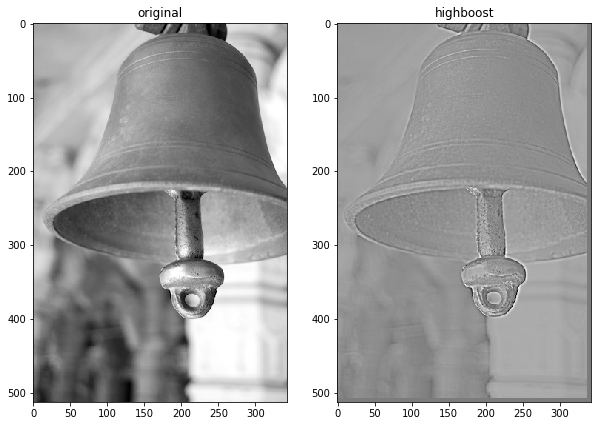

In [2]:
import cv2 
import matplotlib.pyplot as plt 
import numpy as np 

def conv(im,filt):
    orig_h,orig_w = im.shape
    filt_size = filt.shape[0]
    if filt_size%2 == 1:
        pad = filt_size//2
        pad_im = np.pad(im,(pad,pad),mode='constant')
#         new_h = pad_im.shape[0]/
#         new_w = pad_im.shape[1]
    else:
        filt = np.pad(filt,(1,0),mode='constant')
#         new_h = im.shape[0]
#         new_w = im.shape[1]
        
    kernel = np.flipud(np.fliplr(filt))
#     kernel = filt
    start_h = filt_size//2
    start_w = filt_size//2
#     print(orig_h,orig_w)
    
    new_h = (orig_h - filt_size + 2*(filt_size//2)) + 1
    new_w = (orig_w - filt_size + 2*(filt_size//2)) + 1
    output = np.zeros((new_h,new_w))
    i1=0
    for i in range(start_h,new_h - start_h):
        i2 = 0
        for j in range(start_w,new_w - start_w):
#             print(i,j)
#             print(np.arange((j-start_h),(j+start_h+1)))
#             print(np.arange((i-start_h),(i+start_h+1)))
            cur = im[(i-start_h):(i+start_h+1),(j-start_w):(j+start_w+1)]
            output[i1,i2] = np.sum(np.multiply(cur,kernel))
            i2=i2+1
        i1+=1    
            
    return output

def hboost(im,window_size,wt):
    output = np.ones((window_size,window_size))
    output[((window_size)//2)][((window_size)//2)] = 1 - window_size**2 - wt
    output = output*-1
    return output

def highboost(im,window_size,wt):
    orig = im
    im = np.multiply((wt),im)
    all_pass = np.zeros((window_size,window_size))
    all_pass[window_size//2,window_size//2] = 1

    low_pass = np.ones((window_size,window_size)) 
#     ,dtype = np.float32)
    low_pass = low_pass/(window_size**2)
#     low_image = conv(im,low_pass)
    high_pass = all_pass - low_pass
#     blurred = cv2.GaussianBlur(im, (window_size, window_size), 0)
#     output = im - blurred
    high_img = conv(im,high_pass)
    output = im + high_img
#     print(output)
    return output

bell = cv2.imread('../input/bell.jpg',0)
highboost = hboost(bell,7,10)
# highboost = highboost(bell,3,2)
highboost = conv(bell,highboost)
h = bell.shape[0]
w = bell.shape[1]

# norm_im = np.zeros((h,w))
# output = output.astype(np.float32)/255
# cv2.normalize(highboost,highboost, 0, 255, cv2.NORM_MINMAX)
# highboost = highboost.astype('uint8')
# print(highboost)
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)

plt.imshow(bell,'gray')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(highboost,'gray')
plt.title('highboost')
plt.show()

It is observed that as weight is incresed the output becomes more similar to the input image. When the window size is increased then the the edges become less prominant 

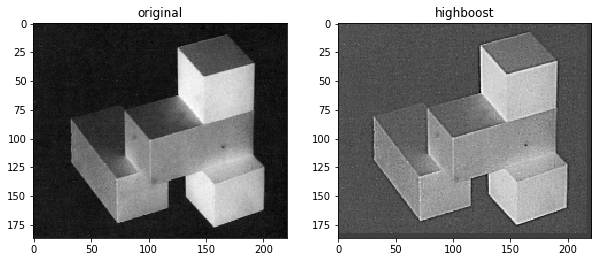

In [18]:
im2 = cv2.imread('../input/cubes.png',0)
highboost2 = hboost(im2,5,20)
# highboost = highboost(bell,3,2)
highboost2 = conv(im2,highboost2)
# cv2.normalize(highboost2,highboost2, 0, 255, cv2.NORM_MINMAX)
# highboost2 = highboost2.astype('uint8')

plt.figure(figsize = (10,10))
plt.subplot(1,2,1)

plt.imshow(im2,'gray')
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(highboost2,'gray')
plt.title('highboost')
plt.show()

Highboost doesnt take account of change in intensity but bilateral does .
Bilateral sharpens edges and smoothens the other parts whereas highboost only sharpens the edges 